<a href="https://colab.research.google.com/github/gannannavelorange/575/blob/master/src/ib_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
!git clone https://github.com/gannannavelorange/575

Cloning into '575'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 557 (delta 1), reused 0 (delta 0), pack-reused 548
Receiving objects: 100% (557/557), 2.46 MiB | 18.95 MiB/s, done.
Resolving deltas: 100% (225/225), done.


In [68]:
cd 575/src/data_IB_project

/content/575/src/data_IB_project/575/src/data_IB_project/575/src/data_IB_project/575/src/data_IB_project/575/src/data_IB_project


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import scipy.stats as ss
from scipy.stats import norm
from scipy.stats import t

In [0]:
#get weekly interest rate change factor for coupon bond
def getdata(M,N):
  with open(M+'.csv') as file:
      reader=csv.reader(file)
      rows=[row for row in reader]
      DD=[row[1] for row in rows[1:62]]
      DD=[float(d)/100/2 for d in DD]     #continuous compounded interest rate 
      D=[row[2] for row in rows[1+N:53+N]]
      D=[float(d)/100/2 for d in D]   #risk factor change
      return DD,D

In [0]:
c1=1.75/100*1000/2
c2=6/100*1000/2
F1=1000

In [0]:
def BOND(M):                  #today is 2020/02/14 
 t1=[]
 t2=[]
 t3=[]
 for i in range(0,10):   # estimate 2010/02/14-2020/04/17
  dd_1=getdata(M,i)[0]  #interest rate
  d_1=getdata(M,i)[1]   #interest rate change
  week_bond1=[]
  #ks_1 = norm.fit(d_1)
  #r1=dd_1[51+i] 
  #dd_2=getdata('bond3.625',n)[0]
  #d_2=getdata('bond3.625',n)[1]
  #ks_2 = norm.fit(d_2)
  #r2=dd_2[51+i] 
  for j in range(0,52):
     week_bond1.append(rolling_bond(159-7*i,F1,c1,dd_1[i+j],d_1[j],0)[0])   #159=2020/07/15-2020/02/14
  tBond1=t.fit(week_bond1)
  t1.append(tBond1[0])
  t2.append(tBond1[1])
  t3.append(tBond1[2])
 return t1,t2,t3
 

In [73]:
bond1=BOND('bond1')
print(bond1[0])
print(bond1[1])
print(bond1[2])

NameError: ignored

In [0]:
bond1=BOND('bond1')
b1=VaRt1(0.9,bond1[1],bond1[2],bond1[0])
b2=VaRt1(0.95,bond1[1],bond1[2],bond1[0])
b3=VaRt1(0.99,bond1[1],bond1[2],bond1[0])
#print(cat1[0])
#print(cat1[1])
x=np.linspace(1,10,10)
plt.plot(x,b1[0],'orange',label="VaR_0.9")
plt.plot(x,b1[1],'blue',label="ES_0.9")
plt.plot(x,b2[0],'yellow',label="VaR_0.95")
plt.plot(x,b2[1],'green',label="ES_0.95")
plt.plot(x,b3[0],'red',label="VaR_0.99")
plt.plot(x,b3[1],'purple',label="ES_0.99")
plt.xlabel('time')
plt.title('20 year bond:var and ES vs time')
plt.legend()
plt.show()

In [0]:
bond2=BOND('bond3.625')
bb1=VaRt1(0.9,bond2[1],bond2[2],bond2[0])
bb2=VaRt1(0.95,bond2[1],bond2[2],bond2[0])
bb3=VaRt1(0.99,bond2[1],bond2[2],bond2[0])
#print(cat1[0])
#print(cat1[1])
x=np.linspace(1,10,10)
plt.plot(x,bb1[0],'orange',label="VaR_0.9")
plt.plot(x,bb1[1],'blue',label="ES_0.9")
plt.plot(x,bb2[0],'yellow',label="VaR_0.95")
plt.plot(x,bb2[1],'green',label="ES_0.95")
plt.plot(x,bb3[0],'red',label="VaR_0.99")
plt.plot(x,bb3[1],'purple',label="ES_0.99")
plt.xlabel('time')
plt.title('30 year bond:var and ES vs time')
plt.legend()
plt.show()

In [0]:

# for each coupon, linloss could be calculated as L=-c*np.exp(r*t)(r*5-t*x) week=5 days
def linloss_bond(c,r,t,mu,sigma):
  exp=-c*np.exp(r*t)*(r*5-t*mu)
  #exp=-c*np.exp(r*t)*(r*1-t*mu)
  var=(np.exp(r*t)*t)**2*(sigma**2)
  return exp,var

In [0]:

def rolling_bond(day,F,c,r,mu,sigma):
  Exp=-F*np.exp(r*(day/182+15))*(r*5-(day/182+15)*mu)
  Var=(np.exp(r*(day/182+15))*(day/182+15))**2*(sigma**2)
  for i in range(0,16):
    t=day/182+i
    Exp=Exp+linloss_bond(c,r,t,mu,sigma)[0]
    Var=Var+linloss_bond(c,r,t,mu,sigma)[1]
  return Exp,Var


In [0]:
Bond1_mu=[]
Bond1_var=[]
Bond2_mu=[]
Bond2_var=[]
for n in range(0,10):   # estimate 2010/02/14-2020/04/17
 dd_1=getdata('bond1',n)[0]
 d_1=getdata('bond1',n)[1]
 ks_1 = norm.fit(d_1)
 r1=dd_1[51+n] 
 dd_2=getdata('bond3.625',n)[0]
 d_2=getdata('bond3.625',n)[1]
 ks_2 = norm.fit(d_2)
 r2=dd_2[51+n] 
 week_bond1=rolling_bond(159-7*n,F1,c1,r1,ks_1[0],ks_1[1])   #159=2020/07/15-2020/02/14
 Bond1_mu.append(week_bond1[0])
 Bond1_var.append(week_bond1[1])
 week_bond2=rolling_bond(182-7*n,F1,c2,r2,ks_2[0],ks_2[1])  
 Bond2_mu.append(week_bond2[0])
 Bond2_var.append(week_bond2[1])
 #print(week[0],week[1])
 #print(week[0])


In [0]:
print(Bond1_mu)
print(Bond1_var)
print(Bond2_mu)
print(Bond2_var)

In [0]:
B11=VaRnorm(0.9,Bond1_mu,np.sqrt(Bond1_var))
B12=VaRnorm(0.95,Bond1_mu,np.sqrt(Bond1_var))
B13=VaRnorm(0.99,Bond1_mu,np.sqrt(Bond1_var))
print(B12[0])
print(B13[0])
x=np.linspace(1,10,10)
#day=['2/22','3/1','11/1','11/4','11/5','11/6']
plt.plot(x,B11[0],'orange',label="VaR_0.9")
plt.plot(x,B11[1],'blue',label="ES_0.9")
plt.plot(x,B12[0],'yellow',label="VaR_0.95")
plt.plot(x,B12[1],'green',label="ES_0.95")
plt.plot(x,B13[0],'red',label="VaR_0.99")
plt.plot(x,B13[1],'purple',label="ES_0.99")
plt.xlabel('time')
plt.title('BOND-20 year:var and ES vs time')
plt.legend()
plt.show()

In [0]:
B21=VaRnorm(0.9,Bond2_mu,np.sqrt(Bond2_var))
B22=VaRnorm(0.95,Bond2_mu,np.sqrt(Bond2_var))
B23=VaRnorm(0.99,Bond2_mu,np.sqrt(Bond2_var))
#print(B12[0])
#print(B13[0])
x=np.linspace(1,10,10)
#day=['2/22','3/1','11/1','11/4','11/5','11/6']
plt.plot(x,B21[0],'orange',label="VaR_0.9")
plt.plot(x,B21[1],'blue',label="ES_0.9")
plt.plot(x,B22[0],'yellow',label="VaR_0.95")
plt.plot(x,B22[1],'green',label="ES_0.95")
plt.plot(x,B23[0],'red',label="VaR_0.99")
plt.plot(x,B23[1],'purple',label="ES_0.99")
plt.xlabel('time')
plt.title('BOND-30 year:var and ES vs time')
plt.legend()
plt.show()

In [0]:
for i in range(0,10):
  print(bb1[0][i])

In [0]:
for i in range(0,10):
  print(bb2[0][i])

In [0]:
for i in range(0,10):
  print(bb3[0][i])

In [0]:
for i in range(0,10):
  print(bb1[1][i])

In [0]:
for i in range(0,10):
  print(bb2[1][i])

In [0]:
for i in range(0,10):
  print(bb3[1][i])

In [0]:
#put option

In [0]:
def N(x):
  cdf=norm.cdf(x,0,1)
  return cdf
def p(x):
  pdf=norm.pdf(x,0,1)
  return pdf

In [0]:
#get weekly stock price log return for option
def getdata2(M,N):
  with open(M+'.csv') as file:
      reader=csv.reader(file)
      rows=[row for row in reader]
      DD=[row[1] for row in rows[1:62]]
      DD=[float(d) for d in DD]
      D=[row[2] for row in rows[1+N:53+N]]
      D=[float(d) for d in D]
      net=[row[3] for row in rows[1+N:53+N]]
      net=[float(d) for d in net]
      return DD,D,net

In [0]:
def getdata3(M,N):
  with open(M+'.csv') as file:
      reader=csv.reader(file)
      rows=[row for row in reader]
      DD=[row[1] for row in rows[1:62]]
      DD=[float(d) for d in DD]
      D=[row[2] for row in rows[1+N:53+N]]
      D=[float(d) for d in D]
      return DD,D

In [0]:
'''
djx=getdata2('DIA',0)
djx1=djx[0]
djx2=djx[1]
std=np.std(djx2)
print(djx1[50])


In [0]:
'''
v_djx=[9.5,9,11.21,39.96,38.84,64.99,102.26,78.84,83.26,57.34,51.95] 

v_cat=[6.31,8.19,7.97,4.4,2.34,0.33,0.26,0.4,0.82,2.34,0.61]
v_vig=[2.05,2.68,2.25,0.14,0.44,0.29,0.29,0.05,0.03,0.07,0.02]
#ir=[-0.07,-0.15,-0.28,-0.57,0.04,0.17,-0.22,-0.46,-0.5,-0.36]
for i in range(0,11):
  print(v_vig[i])

In [0]:
'''
def d(S,K,r,sigma,t):
 d1=(np.log(S/K)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))
 d2=d1-sigma*np.sqrt(t)
 return d1,d2

In [0]:
def deltaput(S,K,r,sigma,t):
  d1=(np.log(S/K)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))
  delta_P=N(float(d1))-1
  return delta_P
def deltacall(S,K,r,sigma,t):
  d1=(np.log(S/K)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))
  delta_C=N(float(d1))
  return delta_C
def rhoput(S,K,r,sigma,t):
  d1=(np.log(S/K)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))
  d2=d1-sigma*np.sqrt(t)
  rho_P=-K*t*np.exp(-r*t)*N(float(-d2))
  return rho_P
def rhocall(S,K,r,sigma,t):  
  d1=(np.log(S/K)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))
  d2=d1-sigma*np.sqrt(t)
  rho_C=K*t*np.exp(-r*t)*N(float(d2))
  return rho_C
def thetaput(S,K,r,sigma,t):
  d1=(np.log(S/K)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))
  d2=d1-sigma*np.sqrt(t)
  theta_P=-S*sigma/(2*np.sqrt(t))*np.exp(-float(d1)**2/2)/np.sqrt(2*np.pi)+r*K*np.exp(-r*t)*N(float(-d2))
  return theta_P
def thetacall(S,K,r,sigma,t):  
  d1=(np.log(S/K)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))
  d2=d1-sigma*np.sqrt(t)
  theta_C=-S*sigma/(2*np.sqrt(t))*np.exp(-float(d1)**2/2)/np.sqrt(2*np.pi)-r*K*np.exp(-r*t)*N(float(d2))
  return theta_C
def vega(S,K,r,sigma,t):  
  d1=(np.log(S/K)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))
  d2=d1-sigma*np.sqrt(t)
  vega=S*np.sqrt(t)*np.exp(-float(d1)**2/2)/np.sqrt(2*np.pi)
  return vega
def gamma(S,K,r,sigma,t):
  d1=(np.log(S/K)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))
  d2=d1-sigma*np.sqrt(t)
  gamma=np.exp(-float(d1)**2/2)/np.sqrt(2*np.pi)/(S*sigma*np.sqrt(t))
  return gamma
def vomma(S,K,r,sigma,t):
  d1=(np.log(S/K)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))
  d2=d1-sigma*np.sqrt(t)
  vomma=-d1*S*np.sqrt(t)*np.exp(-float(d1)**2/2)/np.sqrt(2*np.pi)*(np.sqrt(t)-d1/(sigma**2*np.sqrt(t)))
  return vomma
def vanna(S,K,r,sigma,t):
  d1=(np.log(S/K)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))
  d2=d1-sigma*np.sqrt(t)
  vanna=np.exp(-float(d1)**2/2)/np.sqrt(2*np.pi)*(np.sqrt(t)-d1/(sigma**2*np.sqrt(t)))
  return vanna

In [0]:
djxmu=[]
djxvariance=[]
std=[]
for i in range(1,10):    #estimate loss on 2020/02/14 02/21 02/28 3/6
  djx=getdata2('DIA',i)
  ir=getdata2('IR',i)
  djx1=djx[0]   #price
  djx2=djx[1]    #log return
  djx3=djx[2]   #net return of stock
  #std=np.std(djx2)
  std.append(np.std(djx2))
  delta1=deltaput(djx1[51+i],293,ir[i-1],std[i-1],(125-7*i)/250)   #t=(2020/06/18-2020/02/14)/250
  theta1=thetaput(djx1[51+i],293,ir[i-1],std[i-1],(125-7*i)/250)
  rho1=rhoput(djx1[51+i],293,ir[i-1],std[i-1],(125-7*i)/250)
  vega1=vega(djx1[51+i],293,ir[i-1],std[i-1],(125-7*i)/250)
  linlo1=theta1*7/250+delta1*djx3[i-1]+rho1*(ir[i]-ir[i-1])+vega1*(std[i]-std[i-1])      #adjust the subscript
  #leverage=delta*djx1[51+i-1]/v_djx[i-1]
  #djxmu.append(leverage*djx1[51+i]*np.mean(djx2))     #loss:expected mean_option=L*expected mean_stock=L*S_t*mean(log return)
  #djxvariance.append(leverage**2*(std**2))       #loss:expected variance_option=L^2*expected variance_stock=L^2*(S_t^2)*(sigma^2)
  #print(delta)
  #print(leverage)
  djxmu.append(norm.fit(linlo1)[0])
  djxvariance.append(norm.fit(linlo1)[1]) 
print(djxmu)
print(djxvariance)

In [0]:
def putoption(M):                  #today is 2020/02/14 
 mu=[]
 variance=[]
 std=[]
 for i in range(0,10):    #estimate loss on 2020/02/14 02/21 02/28 3/6
   opt=getdata2(M,i)
   ir=getdata3('IR',i)
   opt1=opt[0]   #price
   opt2=opt[1]    #log return
   opt3=opt[2]   #net return of stock
   ir1=ir[0]   #10 year bond yield
   ir2=ir[1]   #interest rate change
   #std=np.std(djx2)
   #std.append(np.std(opt2))
   delta=deltaput(opt1[51+i],293,ir1[51+i],0.1,(125-7*i)/250)   #t=(2020/06/18-2020/02/14)/250
   theta=thetaput(opt1[51+i],293,ir1[51+i],0.1,(125-7*i)/250)
   rho=rhoput(opt1[51+i],293,ir1[51+i],0.1,(125-7*i)/250)
   vvega=vega(opt1[51+i],293,ir1[51+i],0.1,(125-7*i)/250)
   #linloss=theta1*7/250+delta1*djx3[i-1]+rho1*(ir[i]-ir[i-1])+vega1*(std[i]-std[i-1])      #adjust the subscript
   #leverage=delta*djx1[51+i-1]/v_djx[i-1]
   #djxmu.append(leverage*djx1[51+i]*np.mean(djx2))     #loss:expected mean_option=L*expected mean_stock=L*S_t*mean(log return)
   #djxvariance.append(leverage**2*(std**2))       #loss:expected variance_option=L^2*expected variance_stock=L^2*(S_t^2)*(sigma^2)
   #print(delta)
   #print(leverage)
   mu.append(-(theta*7/250+delta*np.mean(opt3)+rho*np.mean(ir2)+vvega*(0.1-0.1)))
   variance.append(delta**2*(np.std(opt3)**2)+(rho**2)*(np.std(ir2)**2)+(vvega**2)*((0.1-0.1)**2))
   #djxmu.append(norm.fit(linlo1)[0])
   #djxvariance.append(norm.fit(linlo1)[1]) 
 return mu,variance
 

In [0]:
def putoption1(M):                  #today is 2020/02/14 
 
 t1=[]
 t2=[]
 t3=[]
 variance=[]
 std=[]
 for i in range(0,10):    #estimate loss on 2020/02/14 02/21 02/28 3/6
   opt=getdata2(M,i)
   ir=getdata3('IR',i)
   opt1=opt[0]   #price
   opt2=opt[1]    #log return
   opt3=opt[2]   #net return of stock
   ir1=ir[0]   #10 year bond yield
   ir2=ir[1]   #interest rate change
   Linloss=[]
   for j in range(0,52):
     delta=deltaput(opt1[i+j],293,ir1[i+j],0.1,(125-7*i)/250)   #t=(2020/06/18-2020/02/14)/250
     theta=thetaput(opt1[i+j],293,ir1[i+j],0.1,(125-7*i)/250)
     rho=rhoput(opt1[i+j],293,ir1[i+j],0.1,(125-7*i)/250)
     vvega=vega(opt1[i+j],293,ir1[i+j],0.1,(125-7*i)/250)
     Linloss.append(-(theta*7/250+delta*opt3[j]+rho*ir2[j]+vvega*(0.1-0.1)))
   toption=t.fit(Linloss)
   t1.append(toption[0])
   t2.append(toption[1])
   t3.append(toption[2])

   #mu.append(theta*7/250+delta*np.mean(opt3)+rho*np.mean(ir2)+vvega*(0.1-0.1))
   #variance.append(delta**2*(np.std(opt3)**2)+(rho**2)*(np.std(ir2)**2)+(vvega**2)*((0.1-0.1)**2))
 return t1,t2,t3

In [0]:
tdjx=putoption1('DIA')
tdjx1=VaRt1(0.9,tdjx[1],tdjx[2],tdjx[0])
tdjx2=VaRt1(0.95,tdjx[1],tdjx[2],tdjx[0])
tdjx3=VaRt1(0.99,tdjx[1],tdjx[2],tdjx[0])
x=np.linspace(1,10,10)
plt.plot(x,tdjx1[0],'orange',label="VaR_0.9")
plt.plot(x,tdjx1[1],'blue',label="ES_0.9")
plt.plot(x,tdjx2[0],'yellow',label="VaR_0.95")
plt.plot(x,tdjx2[1],'green',label="ES_0.95")
plt.plot(x,tdjx3[0],'red',label="VaR_0.99")
plt.plot(x,tdjx3[1],'purple',label="ES_0.99")
plt.xlabel('time')
plt.title('put option DJX:var and ES vs time')
plt.legend()
plt.show()

In [0]:
for i in range(0,10):
  print(tvig3[1][i])

In [0]:
def calloption(M):                  #today is 2020/02/14 
 mu=[]
 variance=[]
 std=[]
 for i in range(0,10):    #estimate loss on 2020/02/14 02/21 02/28 3/6
   opt=getdata2(M,i)
   ir=getdata3('IR',i)
   opt1=opt[0]   #price
   opt2=opt[1]    #log return
   opt3=opt[2]   #net return of stock
   ir1=ir[0]   #10 year bond yield
   ir2=ir[1]   #interest rate change
   delta=deltacall(opt1[51+i],293,ir1[51+i],0.1,(125-7*i)/250)   #t=(2020/06/18-2020/02/14)/250
   theta=thetacall(opt1[51+i],293,ir1[51+i],0.1,(125-7*i)/250)
   rho=rhocall(opt1[51+i],293,ir1[51+i],0.1,(125-7*i)/250)
   vvega=vega(opt1[51+i],293,ir1[51+i],0.1,(125-7*i)/250)
   mu.append(theta*7/250+delta*np.mean(opt3)+rho*np.mean(ir2)+vvega*(0.1-0.1))
   variance.append(delta**2*(np.std(opt3)**2)+(rho**2)*(np.std(ir2)**2)+(vvega**2)*((0.1-0.1)**2))
 return mu,variance
 

In [0]:
def calloption1(M):                  #today is 2020/02/14 
 
 t1=[]
 t2=[]
 t3=[]
 variance=[]
 std=[]
 for i in range(0,10):    #estimate loss on 2020/02/14 02/21 02/28 3/6
   opt=getdata2(M,i)
   ir=getdata3('IR',i)
   opt1=opt[0]   #price
   opt2=opt[1]    #log return
   opt3=opt[2]   #net return of stock
   ir1=ir[0]   #10 year bond yield
   ir2=ir[1]   #interest rate change
   Linloss=[]
   for j in range(0,52):
     delta=deltacall(opt1[i+j],293,ir1[i+j],0.1,(125-7*i)/250)   #t=(2020/06/18-2020/02/14)/250
     theta=thetacall(opt1[i+j],293,ir1[i+j],0.1,(125-7*i)/250)
     rho=rhocall(opt1[i+j],293,ir1[i+j],0.1,(125-7*i)/250)
     vvega=vega(opt1[i+j],293,ir1[i+j],0.1,(125-7*i)/250)
     Linloss.append(theta*7/250+delta*opt3[j]+rho*ir2[j]+vvega*(0.1-0.1))
   toption=t.fit(Linloss)
   t1.append(toption[0])
   t2.append(toption[1])
   t3.append(toption[2])

   #mu.append(theta*7/250+delta*np.mean(opt3)+rho*np.mean(ir2)+vvega*(0.1-0.1))
   #variance.append(delta**2*(np.std(opt3)**2)+(rho**2)*(np.std(ir2)**2)+(vvega**2)*((0.1-0.1)**2))
 return t1,t2,t3

In [0]:
tcat=calloption1('CAT')
print(tcat[0])
print(tcat[1])
print(tcat[2])

In [0]:
tcat1=VaRt1(0.9,tcat[1],tcat[2],tcat[0])
tcat2=VaRt1(0.95,tcat[1],tcat[2],tcat[0])
tcat3=VaRt1(0.99,tcat[1],tcat[2],tcat[0])
#print(cat1[0])
#print(cat1[1])
x=np.linspace(1,10,10)
plt.plot(x,tcat1[0],'orange',label="VaR_0.9")
plt.plot(x,tcat1[1],'blue',label="ES_0.9")
plt.plot(x,tcat2[0],'yellow',label="VaR_0.95")
plt.plot(x,tcat2[1],'green',label="ES_0.95")
plt.plot(x,tcat3[0],'red',label="VaR_0.99")
plt.plot(x,tcat3[1],'purple',label="ES_0.99")
plt.xlabel('time')
plt.title('call option CAT:var and ES vs time')
plt.legend()
plt.show()

In [0]:
tvig=calloption1('VIG')
tvig1=VaRt1(0.9,tvig[1],tvig[2],tvig[0])
tvig2=VaRt1(0.95,tvig[1],tvig[2],tvig[0])
tvig3=VaRt1(0.99,tvig[1],tvig[2],tvig[0])
#print(cat1[0])
#print(cat1[1])
x=np.linspace(1,10,10)
plt.plot(x,tvig1[0],'orange',label="VaR_0.9")
plt.plot(x,tvig1[1],'blue',label="ES_0.9")
plt.plot(x,tvig2[0],'yellow',label="VaR_0.95")
plt.plot(x,tvig2[1],'green',label="ES_0.95")
plt.plot(x,tvig3[0],'red',label="VaR_0.99")
plt.plot(x,tvig3[1],'purple',label="ES_0.99")
plt.xlabel('time')
plt.title('call option VIG:var and ES vs time')
plt.legend()
plt.show()

In [0]:
djx=putoption('DIA')
print(djx[0])
print(djx[1])
djxVaR1=VaRnorm(0.9,djx[0],np.sqrt(djx[1]))
djxVaR2=VaRnorm(0.95,djx[0],np.sqrt(djx[1]))
djxVaR3=VaRnorm(0.99,djx[0],np.sqrt(djx[1]))
print(djxVaR1[0])
print(djxVaR1[1])
x=np.linspace(1,10,10)
#day=['2/22','3/1','11/1','11/4','11/5','11/6']
plt.plot(x,djxVaR1[0],'orange',label="VaR_0.9")
plt.plot(x,djxVaR1[1],'blue',label="ES_0.9")
plt.plot(x,djxVaR2[0],'yellow',label="VaR_0.95")
plt.plot(x,djxVaR2[1],'green',label="ES_0.95")
plt.plot(x,djxVaR3[0],'red',label="VaR_0.99")
plt.plot(x,djxVaR3[1],'purple',label="ES_0.99")
plt.xlabel('time')
plt.title('put option DJX:var and ES vs time')
plt.legend()
plt.show()

In [0]:
for i in range(0,10):
  print(vig3[1][i])

In [0]:
def quadratic(M):                  #today is 2020/02/14 
 mu=[]
 variance=[]
 std=[]
 for i in range(0,10):    #estimate loss on 2020/02/14 02/21 02/28 3/6
   opt=getdata2(M,i)
   ir=getdata3('IR',i)
   opt1=opt[0]   #price
   opt2=opt[1]    #log return
   opt3=opt[2]   #net return of stock
   ir1=ir[0]   #10 year bond yield
   ir2=ir[1]   #interest rate change
   delta=deltaput(opt1[51+i],293,ir1[51+i],0.1,(125-7*i)/250)   #t=(2020/06/18-2020/02/14)/250
   theta=thetaput(opt1[51+i],293,ir1[51+i],0.1,(125-7*i)/250)
   rho=rhoput(opt1[51+i],293,ir1[51+i],0.1,(125-7*i)/250)
   vvega=vega(opt1[51+i],293,ir1[51+i],0.1,(125-7*i)/250)
   gamma1=gamma(opt1[51+i],293,ir1[51+i],0.1,(125-7*i)/250)
   vomma1=vomma(opt1[51+i],293,ir1[51+i],0.1,(125-7*i)/250)
   vanna1=vanna(opt1[51+i],293,ir1[51+i],0.1,(125-7*i)/250)
   mu.append(-(theta*7/250+delta*np.mean(opt3)+rho*np.mean(ir2)+vvega*(0.1-0.1)+1/2*gamma1*((opt1[0])**2)*(np.std(opt3)**2)))
   variance.append(delta**2*(np.std(opt3)**2)+(rho**2)*(np.std(ir2)**2)+(vvega**2)*((0.1-0.1)**2)+1/2*gamma1*((opt1[0])**4)*(np.std(opt3)**4))
 return mu,variance

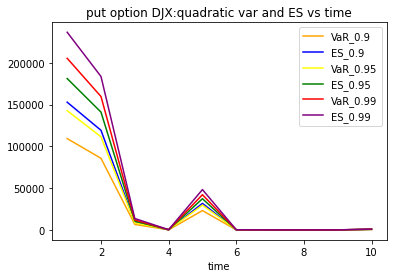

In [89]:
Q=quadratic('DIA')
#print(djx[0])
#print(djx[1])
Q1=VaRnorm(0.9,Q[0],np.sqrt(Q[1]))
Q2=VaRnorm(0.95,Q[0],np.sqrt(Q[1]))
Q3=VaRnorm(0.99,Q[0],np.sqrt(Q[1]))
#print(djxVaR1[0])
#print(djxVaR1[1])
x=np.linspace(1,10,10)
#day=['2/22','3/1','11/1','11/4','11/5','11/6']
plt.plot(x,Q1[0],'orange',label="VaR_0.9")
plt.plot(x,Q1[1],'blue',label="ES_0.9")
plt.plot(x,Q2[0],'yellow',label="VaR_0.95")
plt.plot(x,Q2[1],'green',label="ES_0.95")
plt.plot(x,Q3[0],'red',label="VaR_0.99")
plt.plot(x,Q3[1],'purple',label="ES_0.99")
plt.xlabel('time')
plt.title('put option DJX:quadratic var and ES vs time')
plt.legend()
plt.show()

In [90]:
for i in range(0,10):
  print(Q1[0][i])

109364.01030424336
85776.40452588123
6583.56286535204
136.58164724784862
23177.33130406155
103.88192377194093
32.40442145143797
23.24206137805943
30.359745072848014
488.57368315168486


In [92]:
for i in range(0,10):
  print(Q2[0][i])

142787.6189502149
111487.58581851459
8452.966407343572
174.65517541417572
29775.883127355253
134.2153325574486
41.6689981218417
29.451463554856154
38.30709389117474
626.6856040875874


In [93]:
for i in range(0,10):
  print(Q3[0][i])

205484.75015004698
159717.48594335324
11959.656554991665
246.07478231447436
42153.6689546136
191.11576274461012
59.047803180499415
41.09926936406131
53.214998565121924
885.7605986191186


In [94]:
for i in range(0,10):
  print(Q1[1][i])

152919.49578002258
119281.55339290497
9019.648677749683
186.19660715912684
31776.137349957648
143.41046061493353
44.47741868166518
31.333752768699814
40.71621614376277
668.5522076154311


In [95]:
for i in range(0,10):
  print(Q2[1][i])

181230.4553765881
141059.81864444737
10603.098529247918
218.44621039715128
37365.34036043592
169.10391339703216
52.3248375098741
36.593332486980955
47.44789714441914
785.5378106613686


In [96]:
for i in range(0,10):
  print(Q3[1][i])

236660.28518094504
183699.33187640368
13703.32391980406
281.58748304262497
48308.40184713995
219.4089449146067
67.68924395351495
46.89102683507852
60.62780829829157
1014.5831047383317


In [0]:
cat=calloption('CAT')
print(cat[0])
print(cat[1])
cat1=VaRnorm(0.9,cat[0],np.sqrt(cat[1]))
cat2=VaRnorm(0.95,cat[0],np.sqrt(cat[1]))
cat3=VaRnorm(0.99,cat[0],np.sqrt(cat[1]))
#print(cat1[0])
#print(cat1[1])
x=np.linspace(1,10,10)
plt.plot(x,cat1[0],'orange',label="VaR_0.9")
plt.plot(x,cat1[1],'blue',label="ES_0.9")
plt.plot(x,cat2[0],'yellow',label="VaR_0.95")
plt.plot(x,cat2[1],'green',label="ES_0.95")
plt.plot(x,cat3[0],'red',label="VaR_0.99")
plt.plot(x,cat3[1],'purple',label="ES_0.99")
plt.xlabel('time')
plt.title('call option CAT:var and ES vs time')
plt.legend()
plt.show()

In [0]:
vig=calloption('VIG')
print(vig[0])
print(vig[1])
vig1=VaRnorm(0.9,vig[0],np.sqrt(vig[1]))
vig2=VaRnorm(0.95,vig[0],np.sqrt(vig[1]))
vig3=VaRnorm(0.99,vig[0],np.sqrt(vig[1]))
#print(cat1[0])
#print(cat1[1])
x=np.linspace(1,10,10)
plt.plot(x,vig1[0],'orange',label="VaR_0.9")
plt.plot(x,vig1[1],'blue',label="ES_0.9")
plt.plot(x,vig2[0],'yellow',label="VaR_0.95")
plt.plot(x,vig2[1],'green',label="ES_0.95")
plt.plot(x,vig3[0],'red',label="VaR_0.99")
plt.plot(x,vig3[1],'purple',label="ES_0.99")
plt.xlabel('time')
plt.title('call option VIG:var and ES vs time')
plt.legend()
plt.show()

In [0]:
def ttt(M):                  #today is 2020/02/14 
 opt=getdata2(M,0)
 return opt


In [0]:
tttt=ttt('DIA')

In [0]:
#using WEEKLY log return
mu_m=np.zeros(15)
names_2=['CAT','DIA','HD','MSFT','NKE','NVDA','PG','TM','VIG','VOO','WMT','GOOG','CHEF','SPB','ORCL']
def getData_m(N):
    Is=[i for i in range(15)]
    Rows=[]
    for name,i in zip(names_2,Is):
        with open(name+'.csv') as file:
            reader=csv.reader(file)
            rows=[row[2] for row in reader]
        mu_m[i]=np.mean([float(row) for row in rows[1+N:53+N]])
        Rows.append([float(row) for row in rows[1+N:53+N]])
    Omega_m=np.cov(np.array(Rows))
    return mu_m,Omega_m,rows

In [0]:
TEST=getData_m(0)
print(TEST[0])
print(TEST[1])


In [0]:
def getdata4(M):
  with open(M+'.csv') as file:
      reader=csv.reader(file)
      rows=[row for row in reader]
      DD=[row[0] for row in rows[1:62]]
      DD=[float(d) for d in DD]
  return DD

In [0]:
#linearized loss mean&variance
def lin_loss(Vt,Wt,mu,omega):
  exp=-Vt*(np.dot(Wt,mu))
  var=(Vt**2)*(np.dot(np.dot(Wt,omega),Wt))
  return exp,var

In [0]:
MU=[]
VAR=[]
#rolling window for linearized loss using WEEKLY log return 
for i in range(0,10):
  data3_m= getData_m(i+1)
  mu3_m=data3_m[0]
  omega3_m=data3_m[1]
  vt=getdata4('PORT_VALUE')
  wt=np.ones(15)*1/15
  a3_m=lin_loss(vt[i+51],wt,mu3_m,omega3_m)
  #print(a3_m[0])
  #print(a3_m[1])
  #x = np.linspace (a3_m[0]-4*np.sqrt(a3_m[1]), a3_m[0]+4*np.sqrt(a3_m[1]))
  #y = normfun(x, a3_m[0], np.sqrt(a3_m[1]))
  #plt.plot(x,y)
  #plt.title('PDF of linearized loss distribution using four year rolling window')
  MU.append(a3_m[0])
  VAR.append(a3_m[1])
print(MU)
print(VAR)

In [0]:
N1=VaRnorm(0.9,MU,np.sqrt(VAR))
N2=VaRnorm(0.95,MU,np.sqrt(VAR))
N3=VaRnorm(0.99,MU,np.sqrt(VAR))
#print(cat1[0])
#print(cat1[1])
x=np.linspace(1,10,10)
plt.plot(x,N1[0],'orange',label="VaR_0.9")
plt.plot(x,N1[1],'blue',label="ES_0.9")
plt.plot(x,N2[0],'yellow',label="VaR_0.95")
plt.plot(x,N2[1],'green',label="ES_0.95")
plt.plot(x,N3[0],'red',label="VaR_0.99")
plt.plot(x,N3[1],'purple',label="ES_0.99")
plt.xlabel('time')
plt.title('stock&ETF:var and ES vs time')
plt.legend()
plt.show()


In [0]:
print(N1[0],N1[1])

In [0]:
for i in range(0,10):
 print(N1[0][i])


In [0]:
for i in range(0,10):
 print(N1[1][i])

In [0]:
for i in range(0,10):
 print(N2[0][i])

In [0]:
for i in range(0,10):
 print(N2[1][i])

In [0]:
for i in range(0,10):
 print(N3[0][i])

In [0]:
for i in range(0,10):
 print(N3[1][i])

In [0]:
N1=VaRnorm(0.9,MU,np.sqrt(VAR))
print(N1)

In [0]:
'''
#linearized loss using monthly log return
mu_m=np.array(getData_m(49)[0])    #first four year monthly log return
omega_m=np.array(getData_m(49)[1])
#print(omega)
vt=193.664                           #20151231 portfolio value
wt=np.ones(15)*1/15
b=lin_loss(vt,wt,mu_m,omega_m)
exp_m=b[0]
var_m=b[1]
print(exp_m)
print(var_m)

In [0]:
def getdata5(M,N):
  with open(M+'.csv') as file:
      reader=csv.reader(file)
      rows=[row for row in reader]
      DD=[row[0] for row in rows[1+N:53+N]]
      DD=[float(d) for d in DD]
  return DD

In [0]:
#t distribution for stock&ETFs
T_df=[]
T_mu=[]
T_sigma=[]
for i in range(0,10):
  data2=getdata5('linearized_loss',i)
  T_stock=t.fit(data2)
  T_df.append(T_stock[0])
  T_mu.append(T_stock[1])
  T_sigma.append(T_stock[2])
print(T_df)
print(T_mu)
print(T_sigma)


In [0]:
T1=VaRt1(0.9,T_mu,T_sigma,T_df)
T2=VaRt1(0.95,T_mu,T_sigma,T_df)
T3=VaRt1(0.99,T_mu,T_sigma,T_df)
#print(cat1[0])
#print(cat1[1])
x=np.linspace(1,10,10)
plt.plot(x,T1[0],'orange',label="VaR_0.9")
plt.plot(x,T1[1],'blue',label="ES_0.9")
plt.plot(x,T2[0],'yellow',label="VaR_0.95")
plt.plot(x,T2[1],'green',label="ES_0.95")
plt.plot(x,T3[0],'red',label="VaR_0.99")
plt.plot(x,T3[1],'purple',label="ES_0.99")
plt.xlabel('time')
plt.title('stock&ETF:var and ES vs time')
plt.legend()
plt.show()

In [0]:
for i in range(0,10):
 print(T3[1][i])

In [0]:
#VaR
def VaRnorm(alpha,mu,sigma):
  VaR=mu+sigma*norm.ppf(alpha)
  ES=mu+sigma*norm.pdf(norm.ppf(alpha))/(1-alpha)
  return VaR,ES

In [0]:
def VaRt(alpha,mu,sigma,v):
  VaR=mu+sigma*t.ppf(alpha,v)
  ES=mu+sigma*t.pdf(t.ppf(alpha,v),v)/(1-alpha)*(v+(t.ppf(alpha,v))**2)/(v-1)
  return VaR,ES

In [0]:
def VaRt1(alpha,mu,sigma,v):
  VaR=mu+sigma*t.ppf(alpha,v)
  a=np.asarray(sigma)/np.asarray(1-alpha)
  ES=mu+a*np.asarray(v+(VaR-mu)**2)/np.asarray(v-np.asarray(1))
  return VaR,ES

In [0]:
T1=VaRt1(0.9,T_mu,T_sigma,T_df)
plt.plot(x,T1[0],'orange',label="VaR_0.9")


In [0]:

a=norm.pdf(0.5)
b=p(0.5)
print(b)

In [0]:
print(t.pdf(0))
print(norm.pdf(0))



In [0]:
#OPTION STRESS TEST
djxmu=[]
djxvariance=[]
std=[]
for i in range(1,10):    #estimate loss on 2020/02/14 02/21 02/28 3/6
  djx=getdata2('DIA',i)
  ir=getdata2('IR',i)
  djx1=djx[0]   #price
  djx2=djx[1]    #log return
  djx3=djx[2]   #net return of stock
  #std=np.std(djx2)
  std.append(np.std(djx2))
  delta1=deltaput(djx1[51+i],293,ir[i-1],std[i-1],(125-7*i)/250)   #t=(2020/06/18-2020/02/14)/250
  theta1=thetaput(djx1[51+i],293,ir[i-1],std[i-1],(125-7*i)/250)
  rho1=rhoput(djx1[51+i],293,ir[i-1],std[i-1],(125-7*i)/250)
  vega1=vega(djx1[51+i],293,ir[i-1],std[i-1],(125-7*i)/250)
  linlo1=theta1*7/250+delta1*djx3[i-1]+rho1*(ir[i]-ir[i-1])+vega1*(std[i]-std[i-1])      #adjust the subscript
  #leverage=delta*djx1[51+i-1]/v_djx[i-1]
  #djxmu.append(leverage*djx1[51+i]*np.mean(djx2))     #loss:expected mean_option=L*expected mean_stock=L*S_t*mean(log return)
  #djxvariance.append(leverage**2*(std**2))       #loss:expected variance_option=L^2*expected variance_stock=L^2*(S_t^2)*(sigma^2)
  #print(delta)
  #print(leverage)
  djxmu.append(norm.fit(linlo1)[0])
  djxvariance.append(norm.fit(linlo1)[1]) 
print(djxmu)
print(djxvariance)

In [0]:
def getdata6(M):
  with open(M+'.csv') as file:
      reader=csv.reader(file)
      rows=[row for row in reader]
      DD=[row[0] for row in rows[1:253]]
      DD=[float(d) for d in DD]
      D=[row[1] for row in rows[1:253]]
      D=[float(d) for d in D]
  return DD,D

In [0]:
def origin_price(S,K,r,sigma,t):
  d1=(np.log(S/K)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))
  d2=d1-sigma*np.sqrt(t)
  callprice=S*N(d1)-K*np.exp(-r*t)*N(d2)
  putprice=-S*N(-d1)+K*np.exp(-r*t)*N(-d2)
  return callprice,putprice

In [0]:
def stresstest(M,K,X):
  aa=getdata6(M)
  orip=origin_price(aa[0][0],K,0.02,0.1,1)[X]
  #delta=deltaput(aa[0][0],K,0.02,0.1,1)
  delta=deltacall(aa[0][0],K,0.02,0.1,1)    #strike=100
  leverage=delta*aa[0][0]/orip
  netoption=leverage*np.array(aa[1])
  nn=norm.fit(netoption)
  mu1=nn[0]
  sigma1=nn[1]
  tt=t.fit(netoption)
  df=tt[0]
  mu2=tt[1]
  sigma2=tt[2]
  return delta,leverage,mu1,sigma1,df,mu2,sigma2


In [0]:
DIA=stresstest('DIA15',165,1)     #STRIKE DIA08=100 DIA15=165 CAT08=55,CAT15=80  VIG08=50, VIG15=75
print(DIA)

In [0]:
aaa=stresstest('VIG15',75,0)    #STRIKE=55
print(aaa)